In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


### Reading images: 

In [6]:
img_data = cv2.imread('images/2010-brown-bear.jpg')
print(img_data.shape)

(599, 398, 3)


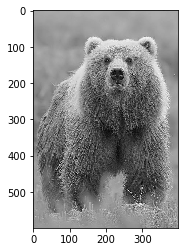

In [12]:
plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

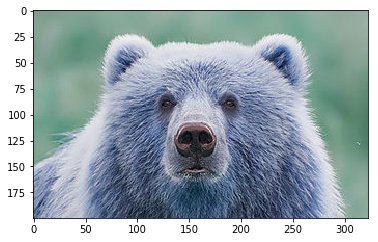

In [15]:
# Next, we can access specific parts of the image using coordinates
bearface = img_data[50:250, 75:550]
plt.imshow(bearface)

OpenCV is popular image processing library. It has wide variety of applications. Some of the popular applications are:
1. Pre-processing image
2. Detecting lines, circles, other shapes etc.
3. Edge detection
4. Image segmentation
5. Object Tracking

## OpenCV vs Deep Learning Library (Keras, Tensorflow etc)
In Deep Learning, the kernels are learned. You have done image classification, where we just initialise the kernel(filter). The kernels are learned during backpropagation.

In OpenCV, we define particular kernel for particular task. There is no backpropagation, so the value of kernel is not changed. You have seen the example of Edge Detection, where you define a specific value of kernel $\begin{bmatrix}
    1 & 0 & -1  \\
    1 & 0 & -1  \\
    1 & 0 & -1  
\end{bmatrix}$ for extracting the edges. 

index.png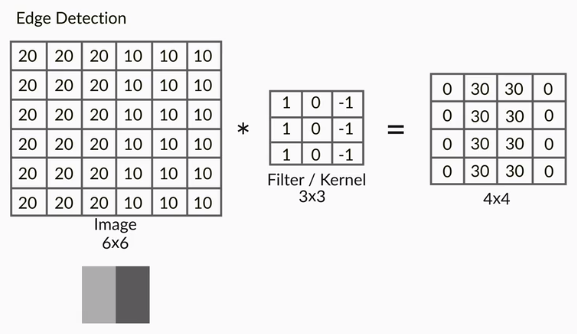

#### Plot multiple images

In [34]:
def plot_images(images, captions=None, cmap=None):
    f, axis = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax, img, capt in zip(axis, images, captions):
        ax.imshow(img, cmap)
        ax.set_title(capt)

In [20]:
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

### Edge Detection:

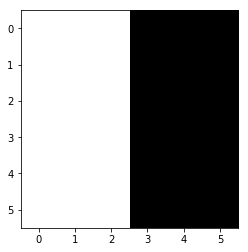

In [21]:
image = np.array([[20,20,20,10,10,10], [20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10]],dtype=np.float32)
plt.imshow(image, cmap= 'gray')

In [22]:
kernel = np.array([[1,0,-1], [1,0,-1],[1,0,-1]],dtype=np.float32) 
kernel

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]], dtype=float32)

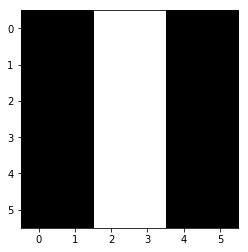

In [27]:
img = cv2.filter2D(image, -1, kernel)
plt.imshow(img, cmap='gray')
plt.show()

## Edge detection example
Let's see one more example edge detection, that is 'canny' edge detection. It is an inbuilt funtion in OpenCV. You can read more it at https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

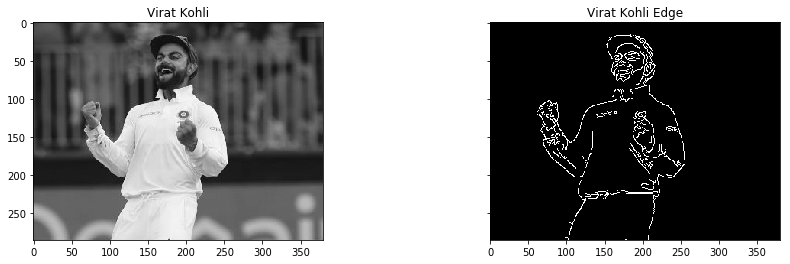

In [37]:
img = cv2.imread('images/virat1.jpg',0)
edge_image = cv2.Canny(img, 100, 200)

plot_images([img, edge_image], cmap='gray', captions = ["Virat Kohli", "Virat Kohli Edge"])

In [40]:
import pytesseract

### Image blurring: 

#### Averaging: 

It is done by convolving the image with normalized filter. \\
It takes the average of all the pixels under kernel area. Replaces central element with average element.  $\begin{bmatrix} 
1 & 1 & 1 \\
1 & 1 &  1 \\
1 & 1 & 1
\end{bmatrix} * 1/9$

In [41]:
img

array([[ 64,  65,  67, ...,  71,  76,  75],
       [ 65,  66,  68, ...,  69,  74,  74],
       [ 67,  68,  70, ...,  66,  71,  72],
       ...,
       [ 98,  98,  97, ..., 135, 145, 154],
       [102, 102, 101, ..., 135, 146, 151],
       [ 99,  98,  98, ..., 136, 137, 137]], dtype=uint8)

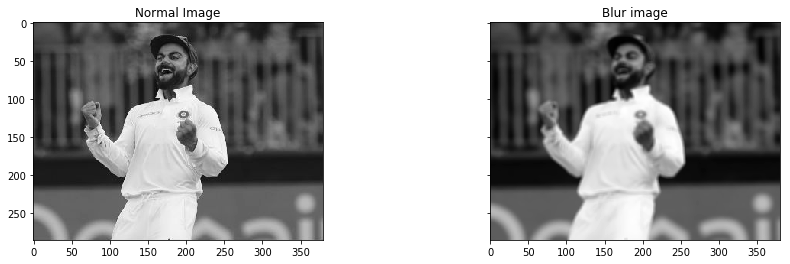

In [42]:
blr_img = cv2.blur(img, (5, 5))
plot_images([img, blr_img], cmap='gray', captions=['Normal Image', 'Blur image'])

#### Gaussian filtering: 

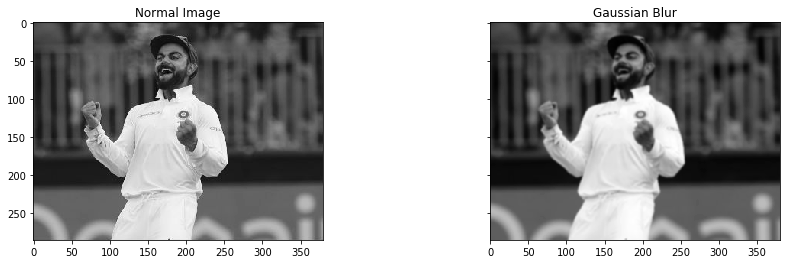

In [44]:
gus_blur = cv2.GaussianBlur(img, (5, 5), 0)
plot_images([img, gus_blur], cmap='gray', captions=['Normal Image', 'Gaussian Blur'])

#### Median Filtering: 

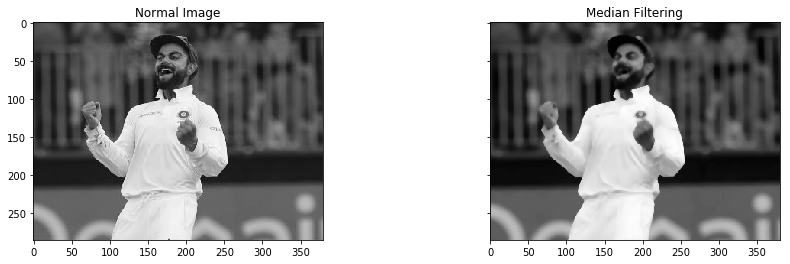

In [45]:
median_blr = cv2.medianBlur(img, 5)
plot_images([img, median_blr], cmap='gray', captions=['Normal Image', 'Median Filtering'])

## Pre-processing techniques
You can improve the result by some of the following pre-processing techniques:
1. Increasing resolution: Increase the resolution of image
2. Deskewing: Deskew the image. It also makes it easier to do more processing.
3. Blurring: It is useful for removing noise. 
3. Convert to Black and White: Convert the image into black and white after deskewing and resizing. It will produce consistent character size and thickness.  
4. Remove Noise: Remove noise from black and white image. Perform operations like morphological transformation, contours etc. to remove the noise. 
5. Train Tesseract on the Font

#### Plot Images with better aspect ratio:

In [71]:
import matplotlib as mpl

def plotting(image, cmap=None):
    if cmap == 'gray':
        height, width = image.shape
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape

    dpi = mpl.rcParams['figure.dpi']
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    plt.imshow(image, cmap)

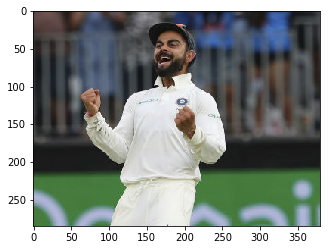

In [52]:
image = cv2.imread('images/virat1.jpg')

plotting(image)

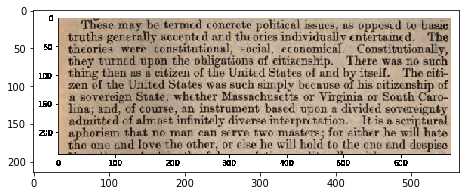

In [53]:
image = cv2.imread('images/writing.png')
plotting(image)

### Reading text in image:

In [58]:
text = pytesseract.image_to_string('images/writing_2.png')
print(text)

300

350

@ markers of the coins and the

cers are pixels that we can label
Object or background. Here,
© two extreme parts oF the

200

250

300

350

400

 

 

 

o 300 200 300 “400 300 600 700 00


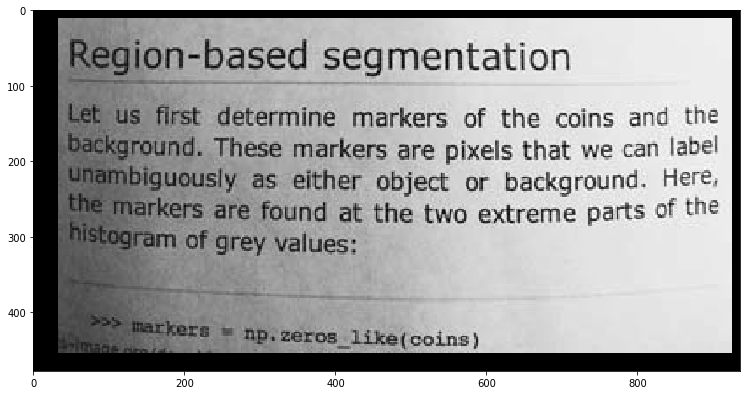

In [66]:
image = cv2.imread('images/writing_3.png')
plotting(image)

In [67]:
text = pytesseract.image_to_string(image)
print(text)

lon-based segmentation

_ first determine markers of the coins and the
round. These markers are pixels that we can label
Quously as either object or background. Here,
Warkers are found at the two extreme parts of the

 

ee np. Zeros like(coins)


#### Guassian Blur: 

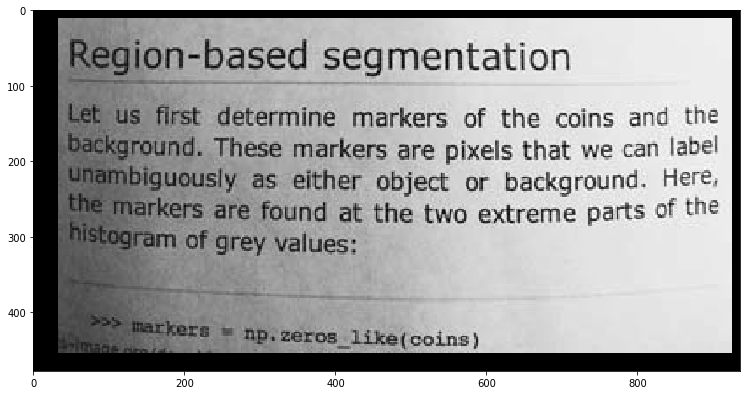

In [72]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plotting(gray, cmap='gray')

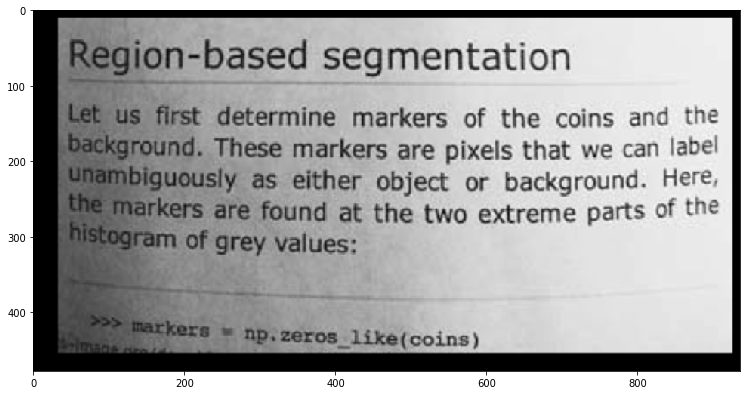

In [75]:
gaussian = cv2.GaussianBlur(gray, (3, 3), 0)
plotting(gaussian, cmap='gray')

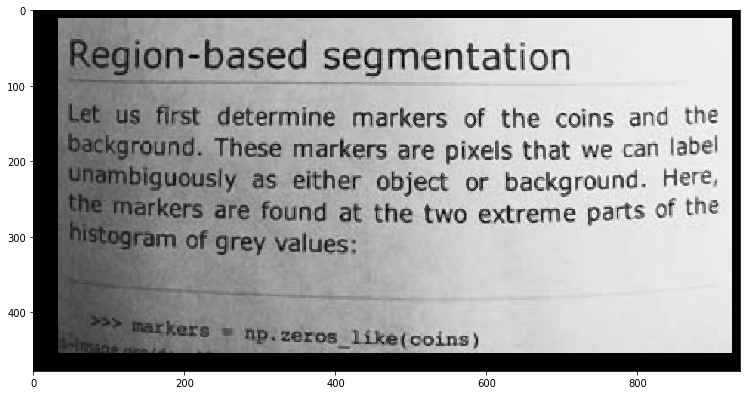

In [104]:
median_blur = cv2.medianBlur(gray, 3)
plotting(median_blur, cmap='gray')

##### Output after blurring: 

In [79]:
print(pytesseract.image_to_string(median_blur))

gion-based segmentation

Us first determine markers of the coins and the

round. These markers are pixels that we can label

Quously as either object or background. Here,

irkers are found at the two extreme parts of the
of grey values:

ee

 

s " Ap. zeros like(coins)


In [80]:
print(pytesseract.image_to_string(gaussian))

igion-based segmentation

biguously as either object or background. Here,
lerkers are found at the two extreme parts of the
ram Of grey values:

 

kers = hp. zeros_like(coins)


## Thresholding the image

The image after smoothing gets blurred. Generally, for OCR to work better, we want sharp borders between characters with high contrast. Binarization makes the image sharp. Also, it reduces the size of the image, which helps in preprocessing in OCR. Let's see some thresholding techniques:

1. Simple Thresholding
2. Adaptive Thresholding
3. Otsu’s Binarization

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

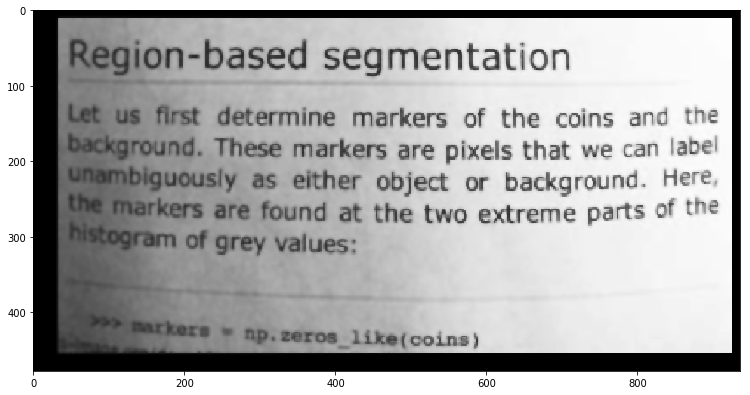

In [133]:
bilateral = cv2.bilateralFilter(gray,9,75,75)
#plotting
plotting(bilateral, cmap = 'gray')

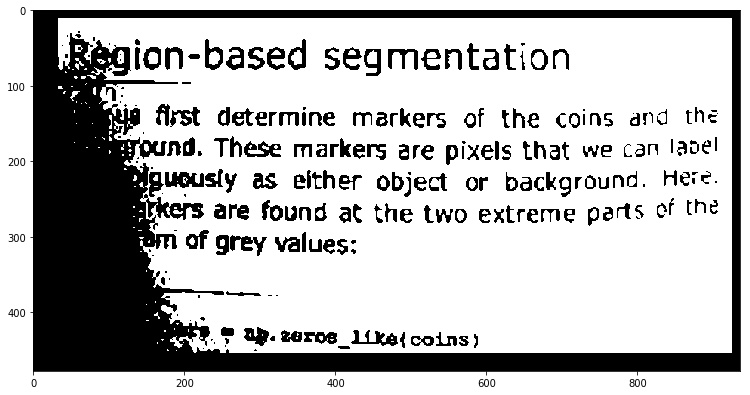

In [105]:
ret, simple_threshould = cv2.threshold(median_blur, 125, 255, cv2.THRESH_BINARY)
plotting(simple_threshould, cmap='gray')

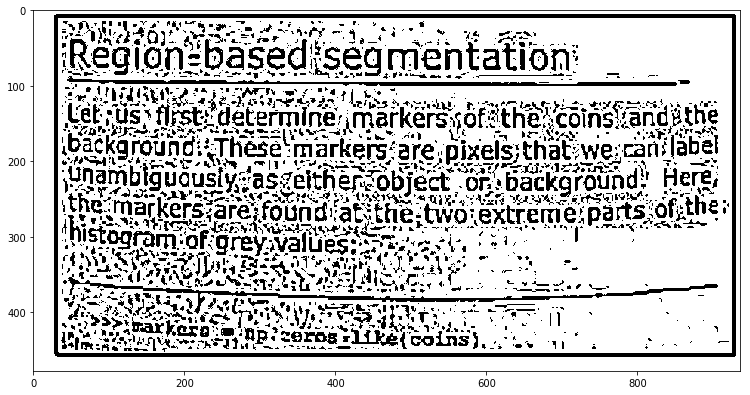

In [106]:
adapter_mean_img = cv2.adaptiveThreshold(median_blur, 225, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plotting(adapter_mean_img, cmap='gray')

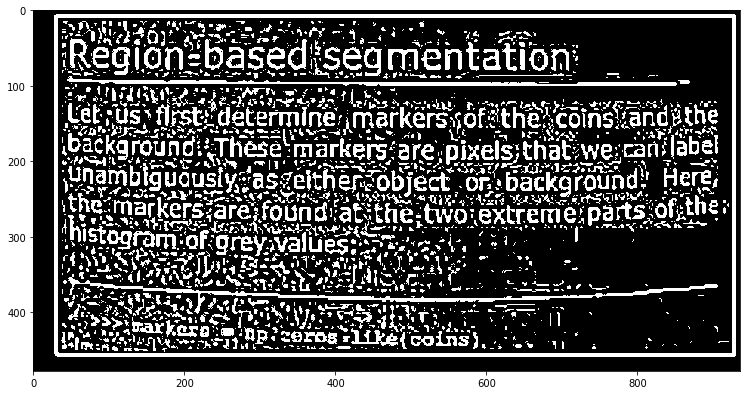

In [107]:
adapter_mean_inv_img = cv2.adaptiveThreshold(median_blur, 225, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plotting(adapter_mean_inv_img, cmap='gray')

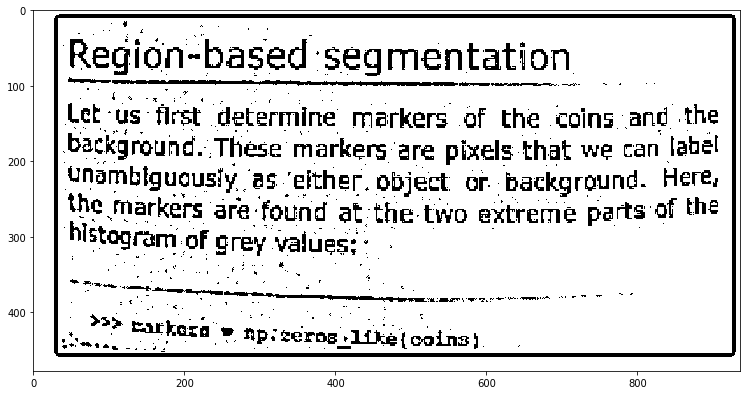

In [134]:
adapter_gaussian_img = cv2.adaptiveThreshold(bilateral, 225, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plotting(adapter_gaussian_img, cmap='gray')

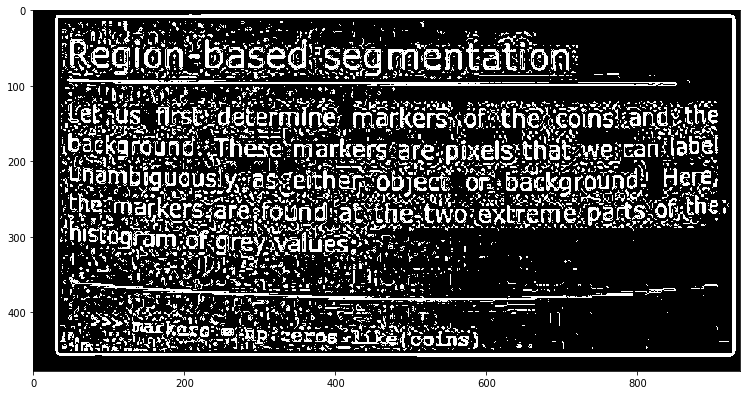

In [109]:
adapter_gaussian_inv_img = cv2.adaptiveThreshold(median_blur, 225, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plotting(adapter_gaussian_inv_img, cmap='gray')

###  Otsu's Thresholding

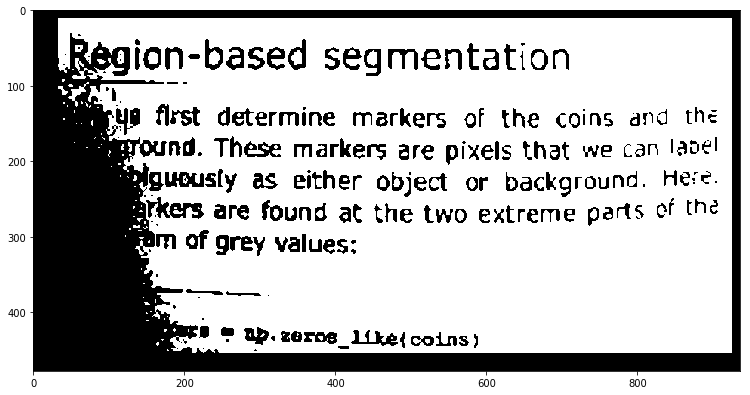

In [93]:
ret, thr_image = cv2.threshold(median_blur, 125, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plotting(thr_image, cmap='gray')

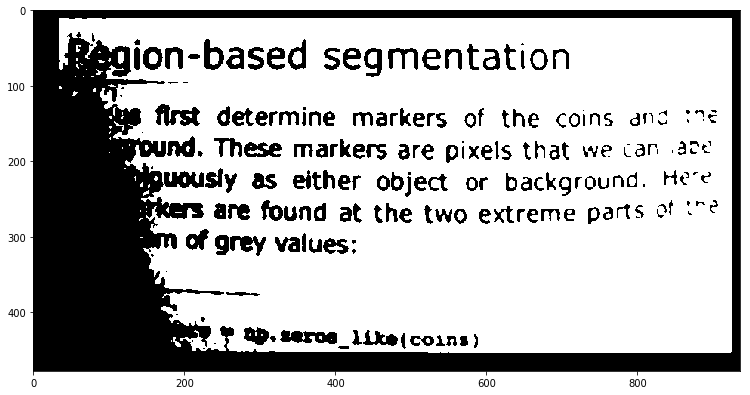

In [94]:
# otsu's threshoulding after gussian filter: 

blr = cv2.GaussianBlur(median_blur, (5, 5), 0)
ret, thr_image = cv2.threshold(blr, 125, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plotting(thr_image, cmap='gray')

### Morphological transformations
Morphological transformations is normally performed on binary images. It needs two inputs, one is the image, other is structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. 
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

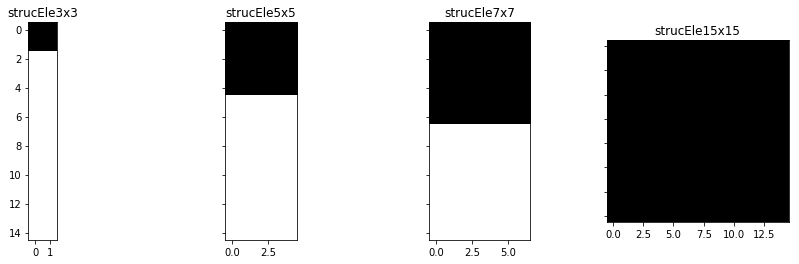

In [96]:
strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))        
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

plot_images([strucEle3x3, strucEle5x5, strucEle7x7, strucEle15x15], cmap='gray', captions = ["strucEle3x3", "strucEle5x5", "strucEle7x7", "strucEle15x15"])

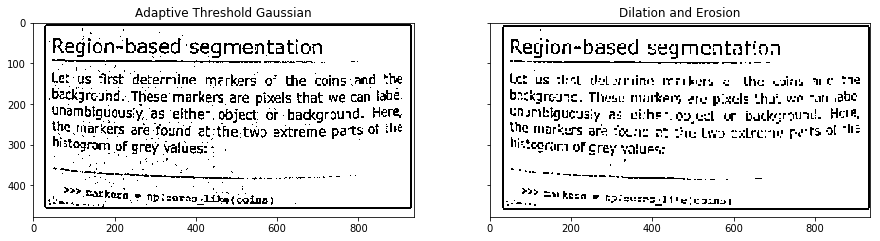

In [136]:
for i in range(2):
    threshouldImg = cv2.dilate(adapter_gaussian_img, strucEle3x3, iterations=2)
    threshouldImg = cv2.erode(threshouldImg, strucEle3x3, iterations=2)

plot_images([adapter_gaussian_img, threshouldImg], cmap='gray', captions = ["Adaptive Threshold Gaussian", "Dilation and Erosion"])            

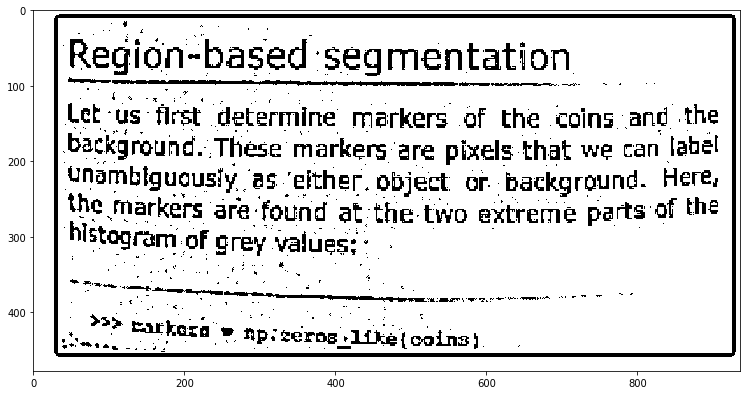

In [137]:
plotting(adapter_gaussian_img, cmap = 'gray')

In [138]:
text = pytesseract.image_to_string(threshouldImg)

print(text)

Region- ~based segmentation

Ler ‘us Theat dlstanuime iwrikers = Lhe waits ae 778
baskgreute. These markers ene poxele Shak ver can aud
tnsmbigue:ss: ry Af ehh oust or buekerwuad. Here,

the markers ara tonne at vie Lyvo ceLrerns pects al “he
hitteorar of crey values

Oe se ee ee

: > Eathern © fpemecss Wb) toons)


## Contours
Contours is an outline representing or bounding the shape or form of something. It is a curve joining all the continuous points (along the boundary), having same color or intensity. Here, we will identify the shape of the dots using contours and remove it. Once we find all the shapes/contours, we will identify the dots which will have shapes having areas less than certain number, aspect ratio etc.  https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html

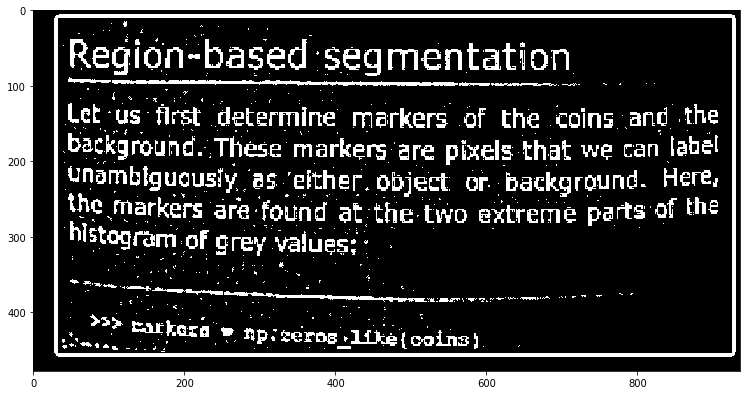

In [139]:
image_reverse = cv2.bitwise_not(adapter_gaussian_img)
plotting(image_reverse, cmap = 'gray')

In [149]:
def drawAndShowContours(wd,ht,contours,strImgName):
    global SCALAR_WHITE
    
    blank_image = np.zeros((ht, wd), np.uint8)
    cv2.drawContours(blank_image, contours, -1, SCALAR_WHITE,-1)

    blank_image_contour_9 = np.zeros((ht,wd), np.uint8)
#     cv2.drawContours(blank_image_contour_9, contours, 2,SCALAR_WHITE,-1)
    plot_images([blank_image], cmap='gray', captions = ["All possible contours"])
    return blank_image

In [151]:
ht = np.size(image_reverse,0)
wd = np.size(image_reverse,1)

im, contours, hierarchy = cv2.findContours(image_reverse, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ('contours.shape: ' + str(len(contours)))
# im2 = drawAndShowContours(wd,ht,contours,'imgContours')
contours

contours.shape: 1


[array([[[  0,   0]],
 
        [[  0, 477]],
 
        [[935, 477]],
 
        [[935,   0]]], dtype=int32)]

In [155]:
im, contours, hierarchy = cv2.findContours(image_reverse,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours

[array([[[  0,   0]],
 
        [[  0, 477]],
 
        [[935, 477]],
 
        [[935,   0]]], dtype=int32)]

## Blob

#### Defining Blob class to store the properties of the contours such as centre of contour, aspect ratio, diagonal size etc. 

In [152]:
class Blob:
    currentContour = [[0,0]]
    
    # First, let's define the 'Blob' function, which creates a 'Blob', with all the necessary parameters
    
    def Blob(self,_contour):
        self.currentContour = _contour
        self.currentBoundingRect = cv2.boundingRect(_contour) 

In [153]:
def drawAndShowBlobs(wd,ht,blobs,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    blank_image = np.zeros((ht,wd,3), np.uint8)
    
    contours=[]
    for blob in blobs:
        contours.append(blob.currentContour)
    #print("C is", contours)  
    contours.pop(0)
    #print("contours ", contours)
    cv2.drawContours(blank_image,contours,-1,SCALAR_WHITE,-1)
    

    plt.imshow(blank_image, cmap = 'gray')
         
    return blank_image 

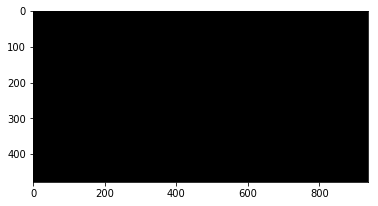

In [165]:
blob = Blob()
blobs = [blob]

area = 30

for contour in contours:
    # This is an instance of the class Blob()
    possiBlob = Blob()
    # This is the Blob function inside the class Blob()
    possiBlob.Blob(contour) # does it work? yes
    contourArea = cv2.contourArea(contour)
    if(contourArea < area):
        blobs.append(possiBlob)

# Now, using the hulls, we draw the blob objects.

dots = drawAndShowBlobs(wd,ht,blobs,'Blobs')

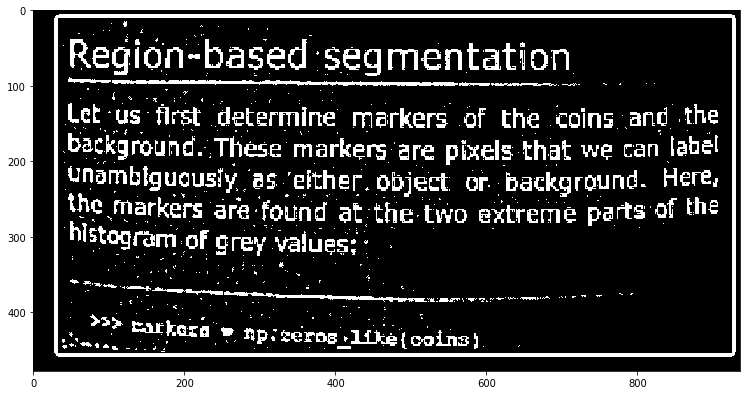

In [166]:
dots_ = cv2.cvtColor(dots, cv2.COLOR_BGR2GRAY)
imgDiff = cv2.absdiff(dots_, image_reverse)
plotting(imgDiff, cmap = 'gray')

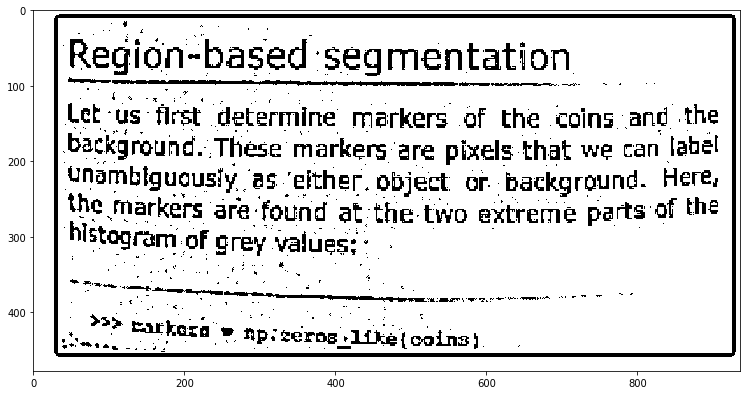

In [167]:
image_clean = cv2.bitwise_not(imgDiff)
plotting(image_clean, cmap = 'gray')

In [168]:
text = pytesseract.image_to_string(image_clean)

print(text)

Region- -based: segmentation

Let: ‘us first ‘determine: markers of the coins and the
background. These markers are pixels that we can label
Unambiguousty, as ‘either. object or. -background. Here,
the markers ‘are: ‘found at:the.two extreme parts of the
histogram of grey. Values: -

3

Oe ae
Se eee emt

 

oy ;
ye a> > earkaca * np: iseres»11ke (coins)
